${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{0}}}$  L0范数:表示向量x中非零元素的个数  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{1}}}$  L1范数（列模）:表示向量x中非零元素的绝对值之和  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{2}}}$  L2范数（谱模）:表示向量元素的平方和再开平方求$A^{T}A$的特征值，找出其中的最大特征值，求其平方根,相当于$max(sqrt(eig(A^{T}A)))$，也叫谱范数  
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{F}}}$  F范数:是把一个矩阵中每个元素的平方求和后开根号(用于表示矩阵量级)   
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{\infty}}}$  无穷范数（行模）:度量向量元素的最大值   
${{ \left\Vert {X} \right\Vert }\mathop{{}}\nolimits_{{*}}}$  核范数Nuclear Norm:矩阵奇异值的和(用于表示低秩矩阵)


# 原理

难点主要有两个：  
1.找到$C$  
2.谱聚类  

## 谱聚类
[机器学习之谱聚类算法](https://blog.csdn.net/liuy9803/article/details/80832249)  
[谱聚类（Spectral Clustering）算法介绍](https://blog.csdn.net/qq_24519677/article/details/82291867)  
[Spectral Clustering](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b)  

&emsp;&emsp;谱聚类（spectral clustering）是一种基于图论的聚类算法，第一步是构图：将数据集中的每个对象看做空间中的点V，将这些点之用边E连接起来，距离较远的两个点之间的边权重值较低、距离较近的两个点之间的边权重值较高，这样就构成了一个基于相似度的无向权重图G(V,E)。第二步是切图：按照一定的切边规则将图切分为不同的子图，规则是**使子图内的边权重和尽可能大，不同子图间的边权重和尽可能小，从而达到聚类目的。**(类似社区发现)

&emsp;&emsp;与传统的聚类方法相比，谱聚类可以对任意形状的数据集进行聚类，计算量较小、实现简单、聚类效果好并能收敛于全局最优解。


### 谱聚类构图

#### 无向权重图$G(V,E)$  
<img src="./resource/tu.png" alt="">
$V$为数据集中所有点$(v_{1},v_{2},...,v_{m})$，定义任意两点$v_{i}$、$v_{j}$之间的权重为$w_{ij}$，由无向图的性质可知$w_{ij}$=$w_{ji}$。  
对于有连接边的两点$w_{ij}>0$；对于没有连接边的点$w_{ij}=0$。




#### 相似矩阵$W$

用所有点之间的权重值构建图的$m*m$相似矩阵$W$，第$i$行第$j$列对应权重$w_{ij}$。  

$W = \begin{pmatrix}
    w_{11} & w_{12} & \dots & w_{1m} \\
    w_{21} & w_{22} & \dots & w_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    w_{m1} & w_{m2} & \dots & w_{mm} \\
\end{pmatrix}_{m \times m}\qquad$  
  
，对角线元素$w_{11}=w_{22}=\dots=w_{mm}=0$




In [228]:
import numpy as np
# Adjacency Matrix
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

#### 度矩阵$D$ (Degree Matrix)

无向权重图中任意一点$v_{i}$的度$d_{i}$定义为它和其它点的边的权重之和  
$d_{i}=\sum_{j=1}^{m}{w_{ij}}$  
利用每个点度的定义，得到一个$m*m$的度矩阵$D$，这是一个对角矩阵，主对角线元素为$d_{i}$，其他位置的元素全为零。

$D = \begin{pmatrix}
    d_{1} &  &  &  \\
     & d_{2} &  &  \\
     &  & \ddots &  \\
     &  &  & d_{m} \\
\end{pmatrix}_{m \times m}\qquad$  





In [229]:
D = np.diag(A.sum(axis=1))
D

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]])

#### 拉普拉斯矩阵$L$

##### 未标准化的拉普拉斯矩阵
定义$L=D-W$，性质：

1. $L$是对称的、半正定矩阵；

+ 特征值中0出现的次数就是图连通区域的个数；

+ 最小特征值是0，因为L矩阵每一行的和均为0；

+ 最小非零特征值是图的代数**连通度**；

*点连通度的定义：一个具有$N$个点的图G中，在去掉任意$k-1$个顶点后$(1\leqslant k\leqslant N)$,所得的子图仍然连通，去掉K个顶点后不连通，则称$G$是$K$连通图，$K$称作图$G$的连通度，记作$K（G）$。

5. 对于任意向量$f=(f_{1},f_{2},...,f_{m})^T$，有：

$$f^TLf = \frac{1}{2}\sum_{i,j = 1}^m(f_i-f_j)^2 $$

##### 标准化的拉普拉斯矩阵

In [230]:
L = D-A
L

array([[ 4, -1, -1, ...,  0, -1, -1],
       [-1,  2, -1, ...,  0,  0,  0],
       [-1, -1,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [-1,  0,  0, ...,  0,  2, -1],
       [-1,  0,  0, ...,  0, -1,  2]])

### 谱聚类的原理

下图右边为拉普拉斯矩阵的特征值

<img alt="" class="qu qv gg n o gf ab gd" width="864" height="360" role="presentation" src="./resource/1_p2vrLlFxdJgGZxCGO5WBmA.gif">
当图完全不连通的时候，所有10个特征值都为0。往图中增加边的时候，特征值增加了。而且，特征值为0的数量代表了连通区域的数量。

<img alt="" class="qu qv gg n o gf ab gd" width="864" height="360" role="presentation" src="./resource/1_pemb5XDfUCnWQMTpAHmpfA.png">
最终将所有连起来的时候，特征值有1个为0，代表有一个连通区域  

**第一个非0的特征值叫spectral gap，代表了图的边密度**  

第二个特征值为Fiedler value，所对应的特征向量为Fiedler vector，Fiedler value估计了把图切成两块的需要的最小切分数量。Fiedler vector中的每个值表示了这个切分中，节点属于那一边。上图中，前四个特征值都很小，说明我们如果把图切分为4块会比较容易。这四个特征值的特征向量也告诉我们应该如何切分。  
  
> 一般我们找到特征值之间第一个比较大的gap，作为判断分块数量的依据  
  


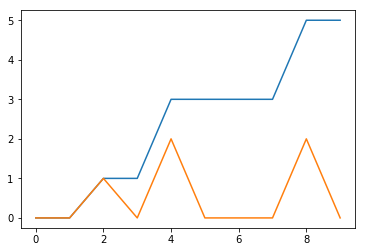

In [231]:
D = np.diag(A.sum(axis=1))
L = D - A
#计算特征值和特征向量
vals, vecs = np.linalg.eig(L)
#重新排序
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

plt.plot(range(len(vals)),vals)

import pandas as pd
a = pd.DataFrame(vals)
eigngap = a-a.shift().fillna(0)
plt.plot(range(len(eigngap)),eigngap)
plt.show()

In [197]:
#设置一下np的输出格式
np.set_printoptions(threshold=10,precision= 4,suppress=True)

In [77]:
#计算特征值和特征向量
vals, vecs = np.linalg.eig(L)
#特征值#特征向量
vals, vecs

(array([ 5.,  0.,  1.,  3.,  5., -0.,  1.,  3.,  3.,  3.]),
 array([[ 0.8944, -0.4472,  0.    , ..., -0.    ,  0.    , -0.    ],
        [-0.2236, -0.4472,  0.5   , ..., -0.2759,  0.1376, -0.09  ],
        [-0.2236, -0.4472,  0.5   , ...,  0.2759, -0.1376,  0.09  ],
        ...,
        [ 0.    ,  0.    ,  0.    , ..., -0.    ,  0.6276, -0.1544],
        [-0.2236, -0.4472, -0.5   , ..., -0.3203, -0.2515, -0.5469],
        [-0.2236, -0.4472, -0.5   , ...,  0.3203,  0.2515,  0.5469]]))

In [78]:
#重新排序
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
vals,vecs

(array([-0.,  0.,  1.,  1.,  3.,  3.,  3.,  3.,  5.,  5.]),
 array([[-0.    , -0.4472, -0.    , ..., -0.    ,  0.    ,  0.8944],
        [ 0.    , -0.4472,  0.0017, ..., -0.2759,  0.    , -0.2236],
        [ 0.    , -0.4472,  0.0017, ...,  0.2759, -0.    , -0.2236],
        ...,
        [-0.4472,  0.    ,  0.5   , ..., -0.    , -0.2236,  0.    ],
        [ 0.    , -0.4472, -0.0017, ..., -0.3203, -0.    , -0.2236],
        [-0.    , -0.4472, -0.0017, ...,  0.3203,  0.    , -0.2236]]))

In [79]:
pd.DataFrame(vecs[:,1:4])

,0,1,2
0,-0.447214,-6.938785e-33,4.820463e-32
1,-0.447214,1.657411e-03,5.000000e-01
2,-0.447214,1.657411e-03,5.000000e-01
3,0.000000,-4.999973e-01,0.000000e+00
4,0.000000,-4.999973e-01,0.000000e+00
5,0.000000,-1.820907e-16,0.000000e+00
6,0.000000,4.999973e-01,0.000000e+00
7,0.000000,4.999973e-01,0.000000e+00
8,-0.447214,-1.657411e-03,-5.000000e-01
9,-0.447214,-1.657411e-03,-5.000000e-01


In [85]:
#用kmeans对第2到第4个特征向量聚成4类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(vecs[:,1:4])
colors = kmeans.labels_
print("Clusters:", colors)

Clusters: [0 0 0 1 1 1 3 3 2 2]


kmeans有随机性，聚类结果每次不一样
<img alt="" class="qu qv gg n o gf ab gd" width="500" height="360" role="presentation" src="./resource/1_omUQ6aCQ88uK2rapwOFgvw.png">

### 对任意数据集进行谱聚类
#### 读取数据
以如下数据集为例
<img alt="" class="qu qv gg n o gf ab gd" width="500" height="360" role="presentation" src="./resource/1_3vBzUSU1jFuSumrhyyhFgQ.png">


In [18]:
from sklearn.datasets import make_circles
import numpy as np

# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

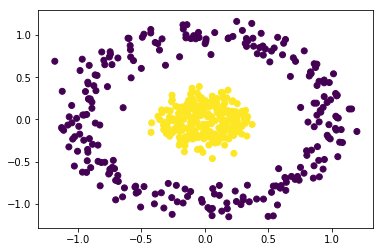

In [19]:
#数据自带标签
#绘制数据
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = labels)
plt.show()

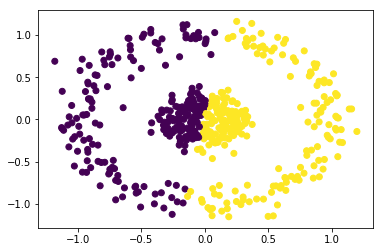

In [20]:
#用kmeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:,:])
kmeans_labels = kmeans.labels_

#绘制数据
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = kmeans_labels)
plt.show()

#### 对数据生成图
##### K-近邻图
如果我们想要应用谱聚类，首先要将数据集变为图。  
有几种方式可以将数据变为图，最容易的是**K-近邻图**。K-近邻图将每个数据点视为图中的一个节点。然后每一个点的k个最近的邻居产生边。一般来说，这个算法对k的选择不会很敏感。5或者10这样的小数值就可以效果很好。  

我们考虑上面的数据，如果以5个近邻来生成图，这样外圈的数值的5个近邻都会在外圈，内圈也是在内圈，这两个圈也不会连通起来，所以数据自然就会被分割成两块。  
好的，接下来看代码

In [21]:
#sklearn.neighbors.kneighbors_graph直接生成k近邻
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(X, n_neighbors=5).toarray()
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


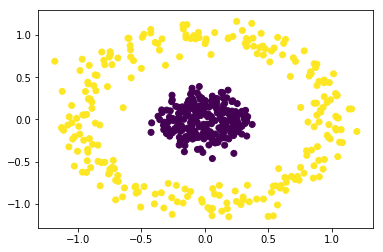

In [27]:
D = np.diag(A.sum(axis=1))
L = D - A
#计算特征值和特征向量
vals, vecs = np.linalg.eig(L)
#重新排序
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]
n = 2
#用kmeans对第2到第4个特征向量聚成4类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n)
kmeans.fit(vecs[:,:n])
spectral_labels = kmeans.labels_

#绘制数据
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = spectral_labels)
plt.show()

##### 其他生成图的方法

K-近邻图虽然是个好方法，但是它的前提是，距离近的点必须属于同一个类簇。而对有些数据来说却不是这样。更具有普遍性的方法是建立一个相似度矩阵（affinity matrix），它和邻接矩阵相似，如果两个数据点完全没有共性，则相似度为0，如果完全相同，则相似度为1。

### 谱聚类算法总结

谱聚类是对数据拉普拉斯矩阵的特征向量进行聚类的算法，其本质是将聚类问题转换为图的最优化分问题，是一种点对聚类算法。常用的相似矩阵生成方法是基于k近邻或高斯核的全连接方式，常用的切图方式是Ncut，最后一步的传统聚类常用K-means。

#### 谱聚类的构建过程主要步骤：

1. 构建表示对象相似度的矩阵$W$，$W=\sum_{ij}{{w_{ij}}},i,j=1,2,...,m$；
+ 构建度矩阵$D$（对角矩阵）；
+ 计算拉普拉斯矩阵$L$，$L=D-W$，对L进行标准化$D^{-1/2}LD^{-1/2}$；
+ 计算前k个最小特征值的特征向量；
+ 将$k$个特征向量组成$m*k$维的矩阵，按行进行标准化得到矩阵F；
+ 对矩阵F中的每一行作为一个$k$维样本，共$m$个样本，用传统方法进行聚类得出最终结果。

#### 谱聚类的特点

1. 处理稀疏数据的聚类很有效；
* 由于使用降维的方法，处理高维数据时复杂度比传统聚类算法好；
* 聚类效果依赖于相似矩阵，不同的相似矩阵得到的最终聚类效果可能很不相同；
* 最小特征值k的数目不容易给定；
* 文档聚类中和模糊聚类的方法结合的问题；
* 计算大规模数据集矩阵的时间、空间效率较差。

#### 谱聚类算法的优缺点
##### 优点
1. 当聚类的类别个数较小的时候，谱聚类的效果会很好，但是当聚类的类别个数较大的时候，则不建议使用谱聚类；

+ 谱聚类算法使用了降维的技术，所以更加适用于高维数据的聚类；

+ 谱聚类只需要数据之间的相似度矩阵，因此对于处理稀疏数据的聚类很有效。这点传统聚类算法（比如K-Means）很难做到

+ 谱聚类算法建立在谱图理论基础上，与传统的聚类算法相比，它具有能在任意形状的样本空间上聚类且收敛于全局最优解

##### 缺点
1. 谱聚类对相似度图的改变和聚类参数的选择非常的敏感；

+ 谱聚类适用于均衡分类问题，即各簇之间点的个数相差不大，对于簇之间点个数相差悬殊的聚类问题，谱聚类则不适用；


#### 各个聚类算法比较


<table cellspacing="0" border="1"><tbody><tr><td valign="top"><p align="justify">**算法**</p></td><td valign="top"><p align="justify">**效率**</p></td><td valign="top"><p align="justify">**聚类形状**</p></td><td valign="top"><p align="justify">**异常数据的抗干扰性**</p></td><td valign="top"><p align="justify">**高维性**</p></td></tr><tr><td valign="top"><p align="justify">K-means</p></td><td valign="top"><p align="justify">一般</p></td><td valign="top"><p align="justify">凸形</p></td><td valign="top"><p align="justify">较低</p></td><td valign="top"><p align="justify">较低</p></td></tr><tr><td valign="top"><p align="justify">BIRCH</p></td><td valign="top"><p align="justify">很高</p></td><td valign="top"><p align="justify">凸形</p></td><td valign="top"><p align="justify">较低</p></td><td valign="top"><p align="justify">较低</p></td></tr><tr><td valign="top"><p align="justify">CURE</p></td><td valign="top"><p align="justify">较高</p></td><td valign="top"><p align="justify">任意形状</p></td><td valign="top"><p align="justify">很高</p></td><td valign="top"><p align="justify">一般</p></td></tr><tr><td valign="top"><p align="justify">DBSCAN</p></td><td valign="top"><p align="justify">一般</p></td><td valign="top"><p align="justify">任意形状</p></td><td valign="top"><p align="justify">较低</p></td><td valign="top"><p align="justify">较高</p></td></tr><tr><td valign="top"><p align="justify">Spectral</p></td><td valign="top"><p align="justify">较高</p></td><td valign="top"><p align="justify">任意形状</p></td><td valign="top"><p align="justify">不敏感</p></td><td valign="top"><p align="justify">较高</p></td></tr></tbody></table>

 